<center>
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ

НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ

«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ
імені ІГОРЯ СІКОРСЬКОГО»

Навчально-науковий інститут прикладного системного аналізу
Кафедра штучного інтелекту


Звіт

про виконання лабораторної роботи №1

з дисципліни «Інтелектуальний аналіз даних»



Виконали:

студент III курсу, груп КІ-33 та КІ-31
Тал Майк, Піддубна Марія, Владислав Дмитренко

Прийняв:
Викладач: Андросов Д.В.







Київ – 2025
</center>

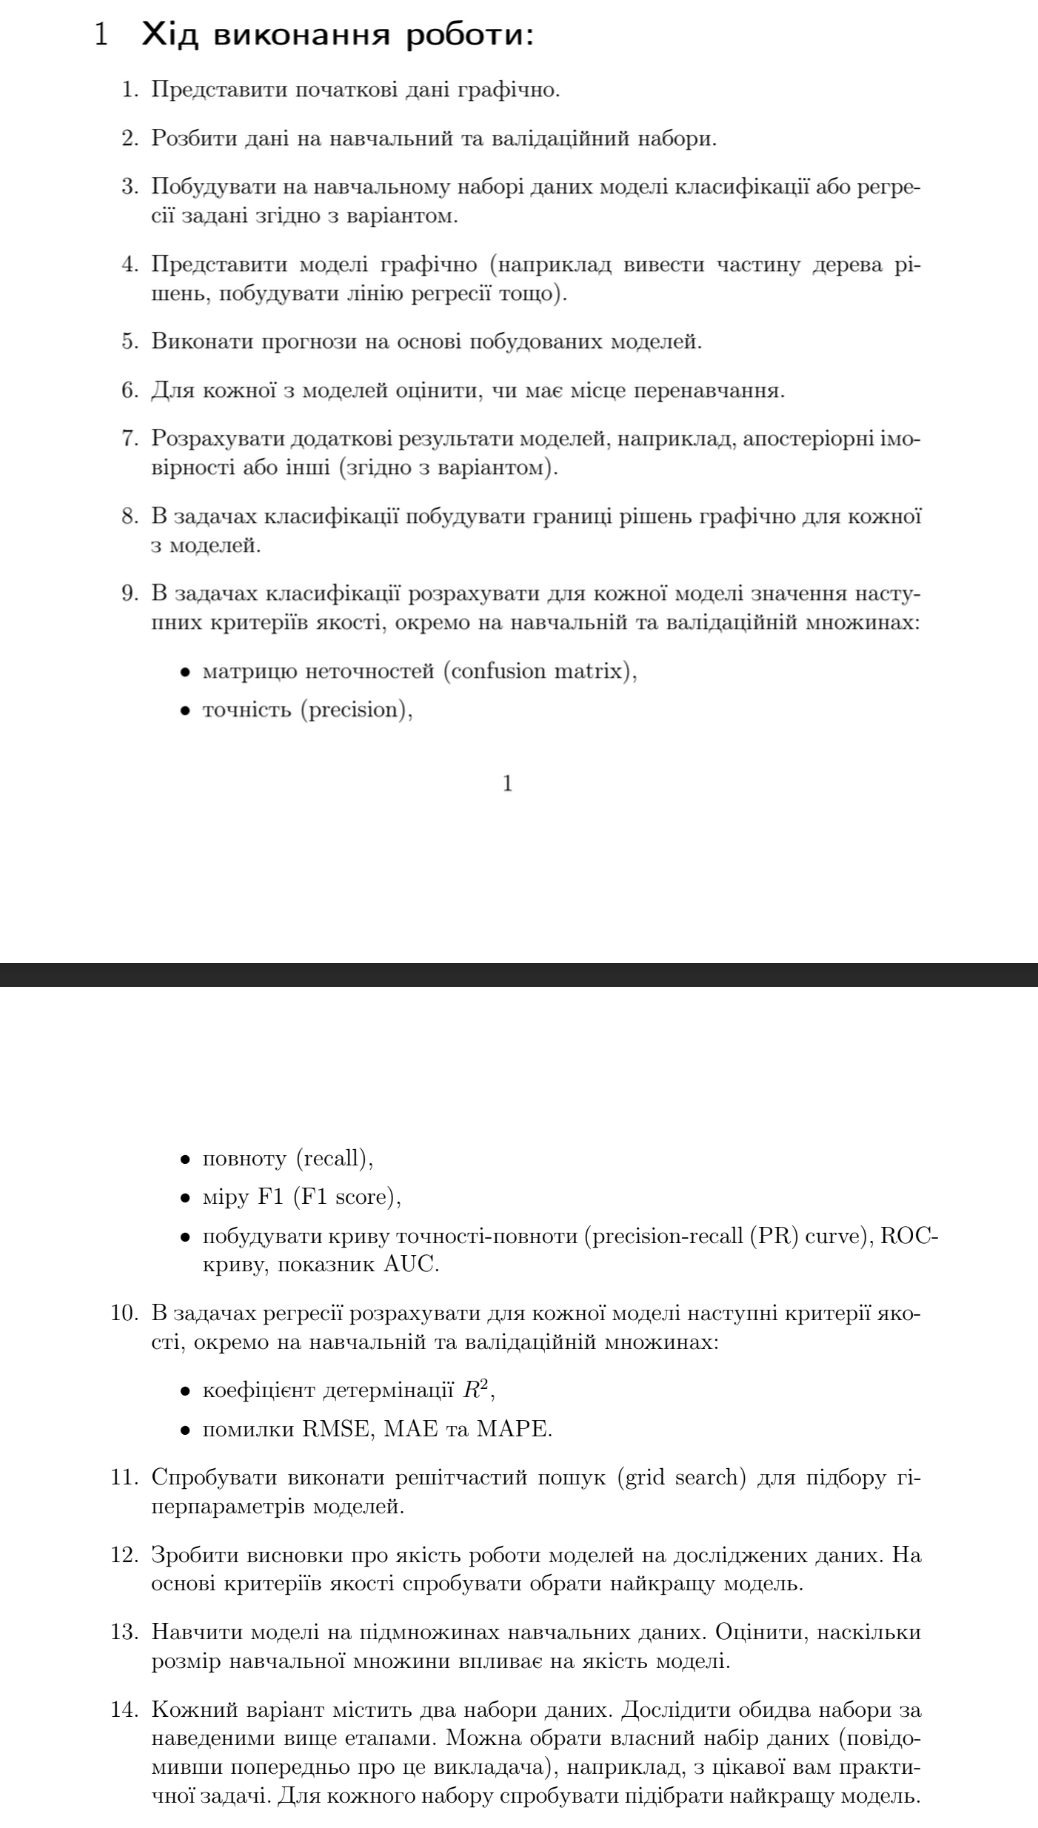

Варіант 14:
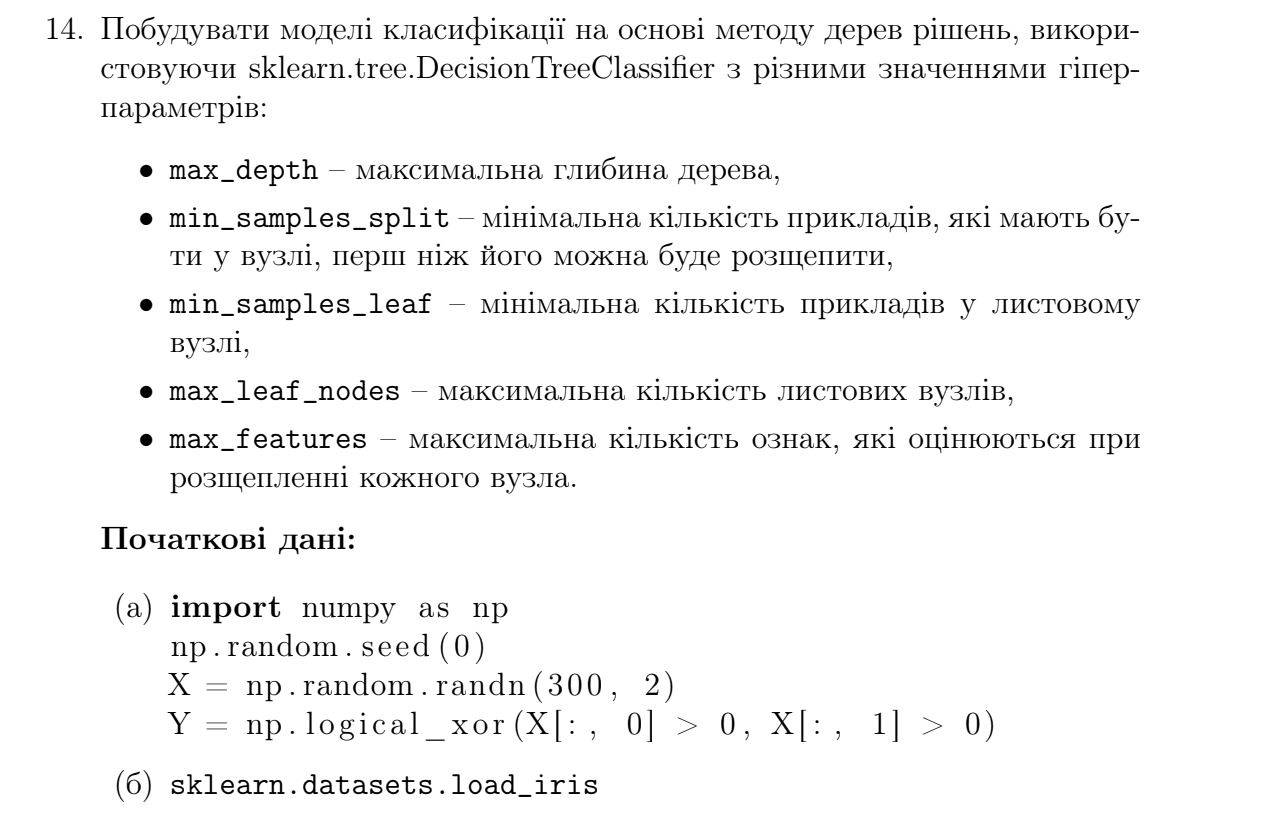

1. Представити початковi данi графiчно.

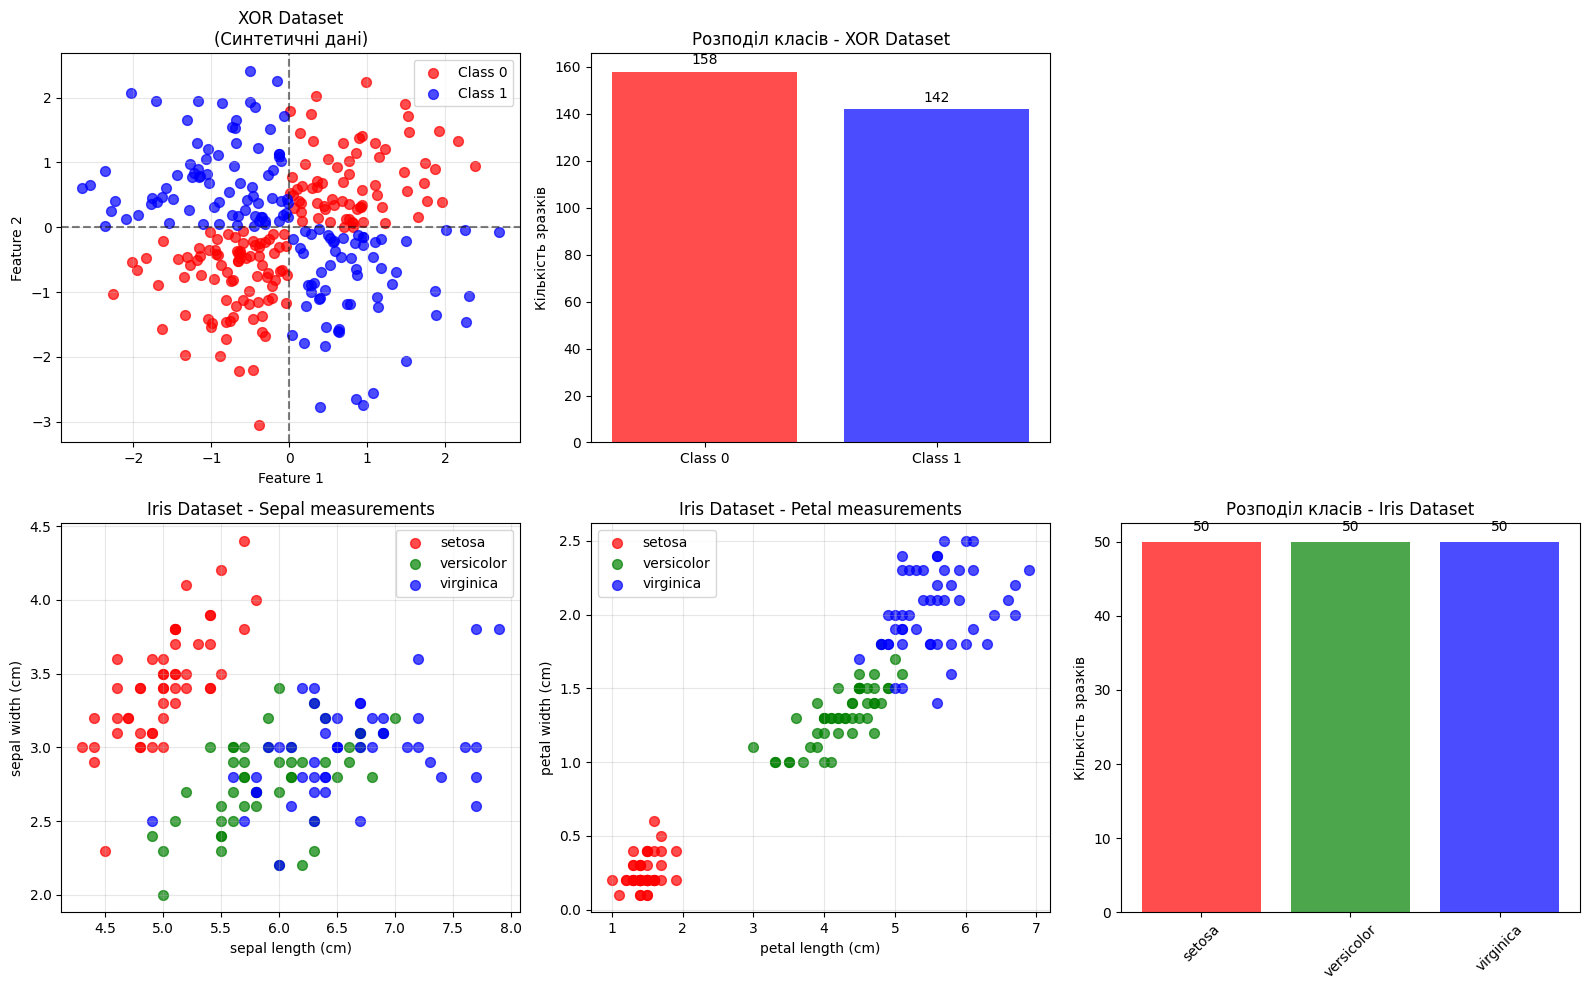

--- СТАТИСТИЧНА ІНФОРМАЦІЯ ---

1. XOR Dataset:
   - Розмір: (300, 2)
   - Кількість класів: 2
   - Розподіл класів: {np.False_: np.int64(158), np.True_: np.int64(142)}
   - Діапазон Feature 1: [-2.66, 2.70]
   - Діапазон Feature 2: [-3.05, 2.41]

2. Iris Dataset:
   - Розмір: (150, 4)
   - Кількість класів: 3
   - Класи: ['setosa' 'versicolor' 'virginica']
   - Розподіл класів: {np.str_('setosa'): np.int64(50), np.str_('versicolor'): np.int64(50), np.str_('virginica'): np.int64(50)}
   - Ознаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

3. Кореляційна матриця для Iris dataset:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)              1.000            -0.118              0.872   
sepal width (cm)              -0.118             1.000             -0.428   
petal length (cm)              0.872            -0.428              1.000   
petal width (cm)               0.818            -0.366           

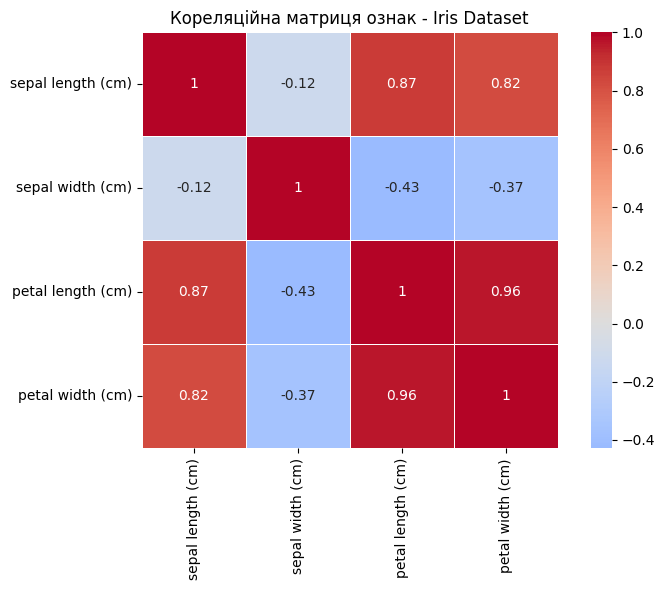

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

# Встановлюємо стиль для кращої візуалізації
plt.style.use('default')
sns.set_palette("husl")

# Початкові дані (а) - XOR dataset
np.random.seed(0)
X_xor = np.random.randn(300, 2)
Y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

# Початкові дані (б) - Iris dataset
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Створюємо фігуру з субплотами
fig = plt.figure(figsize=(16, 10))

# Візуалізація XOR dataset
ax1 = plt.subplot(2, 3, 1)
colors_xor = ['red', 'blue']
for i in range(2):
    mask = Y_xor == i
    plt.scatter(X_xor[mask, 0], X_xor[mask, 1],
               c=colors_xor[i], alpha=0.7, s=50,
               label=f'Class {i}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('XOR Dataset\n(Синтетичні дані)')
plt.legend()
plt.grid(True, alpha=0.3)

# Додаємо лінії для візуалізації XOR логіки
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Розподіл класів для XOR
ax2 = plt.subplot(2, 3, 2)
unique, counts = np.unique(Y_xor, return_counts=True)
plt.bar(['Class 0', 'Class 1'], counts, color=['red', 'blue'], alpha=0.7)
plt.title('Розподіл класів - XOR Dataset')
plt.ylabel('Кількість зразків')
for i, count in enumerate(counts):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

# Iris dataset - Sepal measurements
ax3 = plt.subplot(2, 3, 4)
colors_iris = ['red', 'green', 'blue']
for i in range(3):
    mask = Y_iris == i
    plt.scatter(X_iris[mask, 0], X_iris[mask, 1],
               c=colors_iris[i], alpha=0.7, s=50,
               label=target_names[i])
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset - Sepal measurements')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Iris dataset - Petal measurements
ax4 = plt.subplot(2, 3, 5)
for i in range(3):
    mask = Y_iris == i
    plt.scatter(X_iris[mask, 2], X_iris[mask, 3],
               c=colors_iris[i], alpha=0.7, s=50,
               label=target_names[i])
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title('Iris Dataset - Petal measurements')
plt.legend()
plt.grid(True, alpha=0.3)

# Розподіл класів для Iris
ax5 = plt.subplot(2, 3, 6)
unique, counts = np.unique(Y_iris, return_counts=True)
plt.bar(target_names, counts, color=colors_iris, alpha=0.7)
plt.title('Розподіл класів - Iris Dataset')
plt.ylabel('Кількість зразків')
plt.xticks(rotation=45)
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Виводимо статистичну інформацію
print("--- СТАТИСТИЧНА ІНФОРМАЦІЯ ---\n")

print("1. XOR Dataset:")
print(f"   - Розмір: {X_xor.shape}")
print(f"   - Кількість класів: {len(np.unique(Y_xor))}")
print(f"   - Розподіл класів: {dict(zip(*np.unique(Y_xor, return_counts=True)))}")
print(f"   - Діапазон Feature 1: [{X_xor[:, 0].min():.2f}, {X_xor[:, 0].max():.2f}]")
print(f"   - Діапазон Feature 2: [{X_xor[:, 1].min():.2f}, {X_xor[:, 1].max():.2f}]")

print("\n2. Iris Dataset:")
print(f"   - Розмір: {X_iris.shape}")
print(f"   - Кількість класів: {len(np.unique(Y_iris))}")
print(f"   - Класи: {target_names}")
print(f"   - Розподіл класів: {dict(zip(target_names, np.bincount(Y_iris)))}")
print(f"   - Ознаки: {feature_names}")

# Кореляційна матриця для Iris dataset
print("\n3. Кореляційна матриця для Iris dataset:")
import pandas as pd
iris_df = pd.DataFrame(X_iris, columns=feature_names)
correlation_matrix = iris_df.corr()
print(correlation_matrix.round(3))

# Додаткова візуалізація кореляційної матриці
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Кореляційна матриця ознак - Iris Dataset')
plt.tight_layout()
plt.show()

2. Розбити данi на навчальний та валiдацiйний набори.

Використано statify для більш рівномірного розбиття. Розмір валідаційної вибірки 30%.

In [2]:
# Розбиття даних на навчальний та валідаційний набори
from sklearn.model_selection import train_test_split

# Розбиття XOR dataset
X_xor_train, X_xor_val, Y_xor_train, Y_xor_val = train_test_split(
    X_xor, Y_xor, test_size=0.3, random_state=42, stratify=Y_xor
)

# Розбиття Iris dataset
X_iris_train, X_iris_val, Y_iris_train, Y_iris_val = train_test_split(
    X_iris, Y_iris, test_size=0.3, random_state=42, stratify=Y_iris
)

# Інформація про розбиття
print("XOR Dataset:")
print(f"  Навчальний: {X_xor_train.shape[0]} зразків")
print(f"  Валідаційний: {X_xor_val.shape[0]} зразків")

print("\nIris Dataset:")
print(f"  Навчальний: {X_iris_train.shape[0]} зразків")
print(f"  Валідаційний: {X_iris_val.shape[0]} зразків")

XOR Dataset:
  Навчальний: 210 зразків
  Валідаційний: 90 зразків

Iris Dataset:
  Навчальний: 105 зразків
  Валідаційний: 45 зразків


3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

    Початкові параметри обираємо задля наявності порівняння. Далі будемо шукати оптимальні в відповідному пункті.

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Визначаємо набори гіперпараметрів для тестування
hyperparameters = [
    {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None},
    {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': 'sqrt'},
    {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_leaf_nodes': 20, 'max_features': 'log2'},
    {'max_depth': None, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_features': None},
    {'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_leaf_nodes': 15, 'max_features': 1}
]

# Створюємо та навчаємо моделі для XOR dataset
print("--- МОДЕЛІ ДЛЯ XOR DATASET ---")
xor_models = []

for i, params in enumerate(hyperparameters, 1):
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_xor_train, Y_xor_train)
    xor_models.append(model)

    print(f"Модель {i}: {params}")
    print(f"  Навчена на {X_xor_train.shape[0]} зразках")

# Створюємо та навчаємо моделі для Iris dataset
print("\n--- МОДЕЛІ ДЛЯ IRIS DATASET ---")
iris_models = []

for i, params in enumerate(hyperparameters, 1):
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_iris_train, Y_iris_train)
    iris_models.append(model)

    print(f"Модель {i}: {params}")
    print(f"  Навчена на {X_iris_train.shape[0]} зразках")

--- МОДЕЛІ ДЛЯ XOR DATASET ---
Модель 1: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None}
  Навчена на 210 зразках
Модель 2: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': 'sqrt'}
  Навчена на 210 зразках
Модель 3: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_leaf_nodes': 20, 'max_features': 'log2'}
  Навчена на 210 зразках
Модель 4: {'max_depth': None, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_features': None}
  Навчена на 210 зразках
Модель 5: {'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_leaf_nodes': 15, 'max_features': 1}
  Навчена на 210 зразках

--- МОДЕЛІ ДЛЯ IRIS DATASET ---
Модель 1: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None}
  Навчена на 105 зразках
Модель 2: {'max_depth': 5, 'min_samples_split': 5, 'min_samples

4. Представити моделi графiчно (наприклад вивести частину дерева рiшень, побудувати лiнiю регресiї тощо).

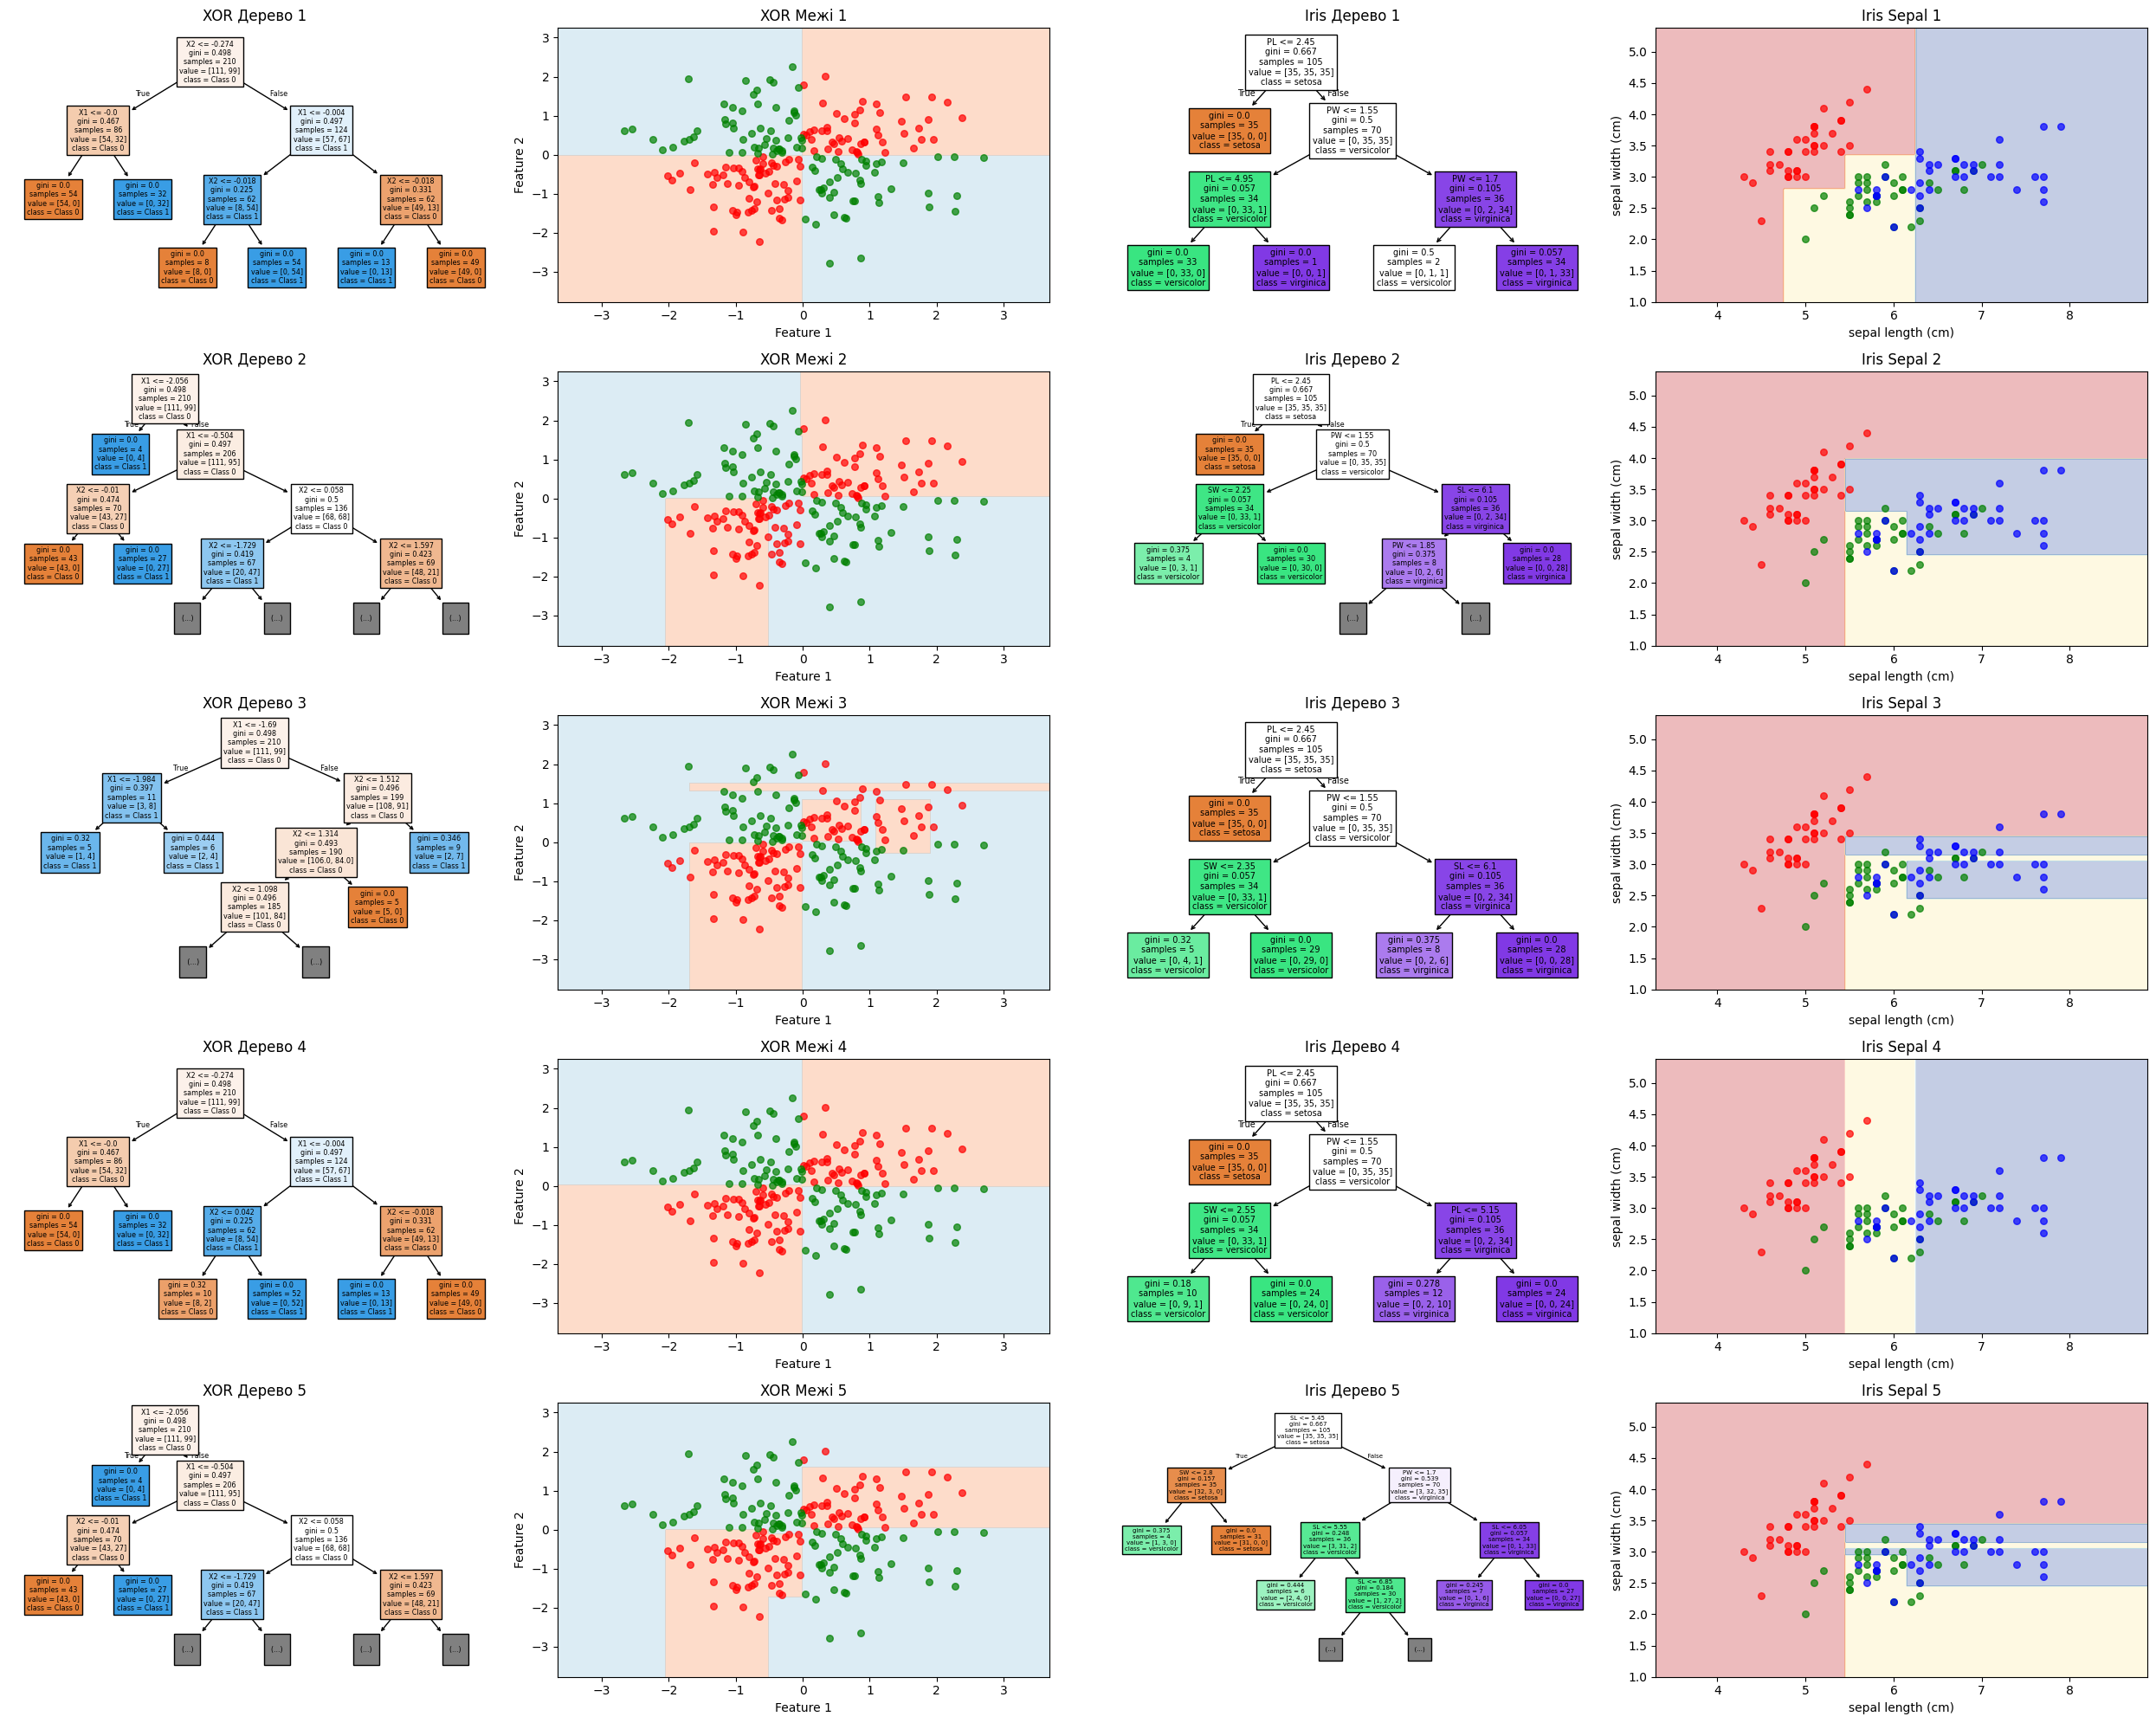

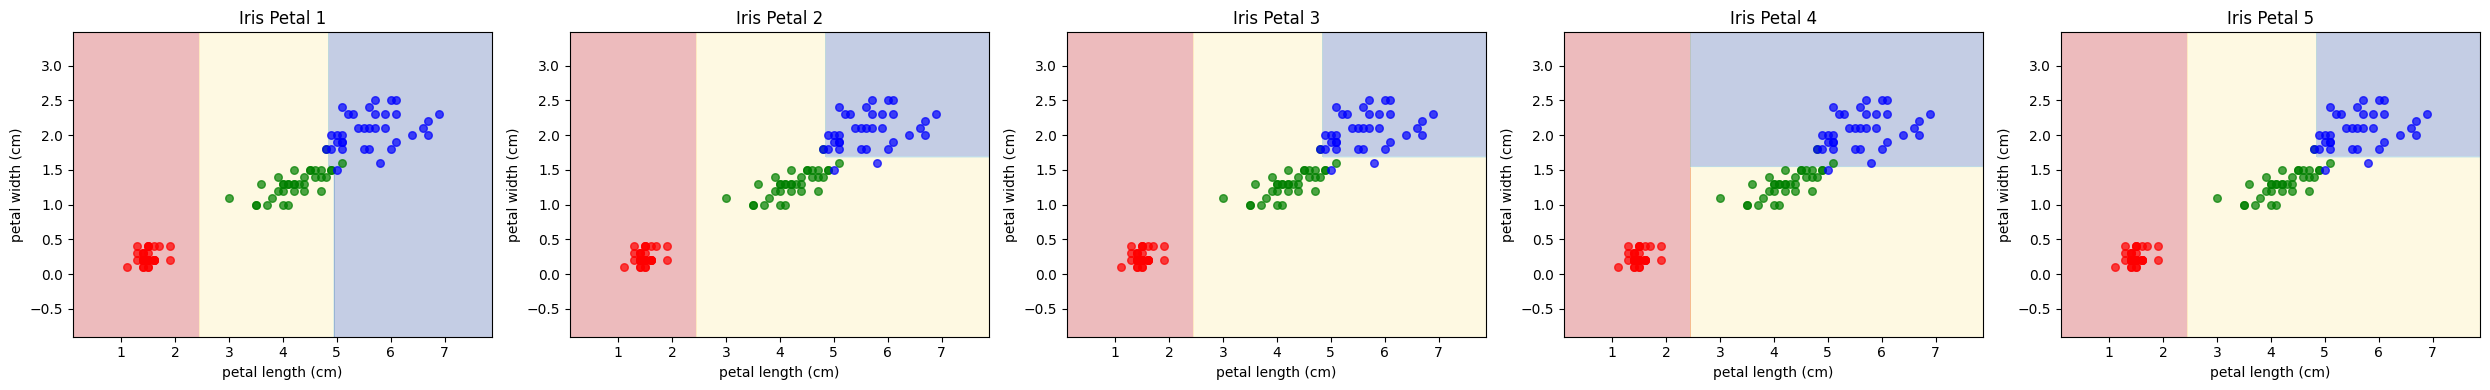

In [4]:
from sklearn.tree import plot_tree

def plot_decision_boundary(model, X, Y, ax, title, feature_names=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

    colors = ['red', 'green', 'blue']
    for i in range(len(np.unique(Y))):
        mask = Y == i
        ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], alpha=0.7, s=30)

    ax.set_title(title)
    if feature_names:
        ax.set_xlabel(feature_names[0])
        ax.set_ylabel(feature_names[1])

# Створюємо спрощені моделі для візуалізації меж (тільки 2 ознаки)
iris_sepal_models = []
iris_petal_models = []

for params in hyperparameters:
    # Модель для sepal measurements
    model_sepal = DecisionTreeClassifier(random_state=42, **params)
    model_sepal.fit(X_iris_train[:, :2], Y_iris_train)
    iris_sepal_models.append(model_sepal)

    # Модель для petal measurements
    model_petal = DecisionTreeClassifier(random_state=42, **params)
    model_petal.fit(X_iris_train[:, 2:], Y_iris_train)
    iris_petal_models.append(model_petal)

# Візуалізація дерев рішень - ВСІ 5 МОДЕЛЕЙ
fig = plt.figure(figsize=(25, 20))

for i in range(5):  # ВСІ 5 МОДЕЛЕЙ
    # XOR дерево
    ax = plt.subplot(5, 4, i*4 + 1)  # 5 рядків
    plot_tree(xor_models[i], max_depth=3, filled=True, feature_names=['X1', 'X2'],
              class_names=['Class 0', 'Class 1'], ax=ax)
    ax.set_title(f'XOR Дерево {i+1}')

    # XOR межі рішень
    ax = plt.subplot(5, 4, i*4 + 2)  # 5 рядків
    plot_decision_boundary(xor_models[i], X_xor_train, Y_xor_train, ax,
                          f'XOR Межі {i+1}', ['Feature 1', 'Feature 2'])

    # Iris дерево
    ax = plt.subplot(5, 4, i*4 + 3)  # 5 рядків
    plot_tree(iris_models[i], max_depth=3, filled=True,
              feature_names=['SL', 'SW', 'PL', 'PW'],
              class_names=target_names, ax=ax)
    ax.set_title(f'Iris Дерево {i+1}')

    # Iris межі рішень (sepal measurements)
    ax = plt.subplot(5, 4, i*4 + 4)  # 5 рядків
    plot_decision_boundary(iris_sepal_models[i], X_iris_train[:, :2], Y_iris_train, ax,
                          f'Iris Sepal {i+1}', [feature_names[0], feature_names[1]])

plt.tight_layout()
plt.show()

# Додаткова візуалізація для Iris (petal measurements) - ВСІ 5 МОДЕЛЕЙ
fig, axes = plt.subplots(1, 5, figsize=(25, 4))  # 5 колонок

for i in range(5):  # ВСІ 5 МОДЕЛЕЙ
    plot_decision_boundary(iris_petal_models[i], X_iris_train[:, 2:], Y_iris_train, axes[i],
                          f'Iris Petal {i+1}', [feature_names[2], feature_names[3]])

plt.tight_layout()
plt.show()

5. Виконати прогнози на основi побудованих моделей.

In [5]:
from sklearn.metrics import accuracy_score

# Прогнози для XOR dataset
print("--- ПРОГНОЗИ ДЛЯ XOR DATASET ---")
xor_predictions = []

for i, model in enumerate(xor_models, 1):
    pred = model.predict(X_xor_val)
    xor_predictions.append(pred)
    accuracy = accuracy_score(Y_xor_val, pred)

    class_0_count = int(np.sum(pred == False))
    class_1_count = int(np.sum(pred == True))

    print(f"Модель {i}: Точність = {accuracy:.3f}")
    print(f"  Class 0: {class_0_count} | Class 1: {class_1_count}")

# Прогнози для Iris dataset
print(f"\n--- ПРОГНОЗИ ДЛЯ IRIS DATASET ---")
iris_predictions = []

for i, model in enumerate(iris_models, 1):
    pred = model.predict(X_iris_val)
    iris_predictions.append(pred)
    accuracy = accuracy_score(Y_iris_val, pred)

    setosa_count = int(np.sum(pred == 0))
    versicolor_count = int(np.sum(pred == 1))
    virginica_count = int(np.sum(pred == 2))

    print(f"Модель {i}: Точність = {accuracy:.3f}")
    print(f"  setosa: {setosa_count} | versicolor: {versicolor_count} | virginica: {virginica_count}")

--- ПРОГНОЗИ ДЛЯ XOR DATASET ---
Модель 1: Точність = 1.000
  Class 0: 47 | Class 1: 43
Модель 2: Точність = 0.844
  Class 0: 33 | Class 1: 57
Модель 3: Точність = 0.878
  Class 0: 36 | Class 1: 54
Модель 4: Точність = 0.989
  Class 0: 48 | Class 1: 42
Модель 5: Точність = 0.911
  Class 0: 39 | Class 1: 51

--- ПРОГНОЗИ ДЛЯ IRIS DATASET ---
Модель 1: Точність = 0.978
  setosa: 15 | versicolor: 14 | virginica: 16
Модель 2: Точність = 0.844
  setosa: 15 | versicolor: 18 | virginica: 12
Модель 3: Точність = 0.889
  setosa: 15 | versicolor: 14 | virginica: 16
Модель 4: Точність = 0.889
  setosa: 15 | versicolor: 14 | virginica: 16
Модель 5: Точність = 0.844
  setosa: 14 | versicolor: 18 | virginica: 13


Можемо побачити, що з наявних, найбільш точною на валідаційному сеті є перша модель: {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None}.

6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.

In [6]:
def evaluate_overfitting(models, X_train, Y_train, X_val, Y_val, dataset_name):
    results = []

    for i, model in enumerate(models, 1):
        train_acc = model.score(X_train, Y_train)
        val_acc = model.score(X_val, Y_val)
        gap = train_acc - val_acc

        # Визначаємо рівень перенавчання
        if gap < 0.05:
            overfitting_status = "Немає"
        elif gap < 0.15:
            overfitting_status = "Помірне"
        else:
            overfitting_status = "Сильне"

        results.append({
            'Модель': i,
            'Train Accuracy': train_acc,
            'Val Accuracy': val_acc,
            'Gap': gap,
            'Overfitting': overfitting_status
        })

    # Створюємо DataFrame з результатами
    df = pd.DataFrame(results)

    print(f"--- ОЦІНКА ПЕРЕНАВЧАННЯ - {dataset_name} ---")
    print(df.to_string(index=False))
    print("\n")
    return df

# Оцінка перенавчання для XOR Dataset
xor_overfitting_df = evaluate_overfitting(
    xor_models,
    X_xor_train, Y_xor_train,
    X_xor_val, Y_xor_val,
    "XOR DATASET"
)

# Оцінка перенавчання для Iris Dataset
iris_overfitting_df = evaluate_overfitting(
    iris_models,
    X_iris_train, Y_iris_train,
    X_iris_val, Y_iris_val,
    "IRIS DATASET"
)

--- ОЦІНКА ПЕРЕНАВЧАННЯ - XOR DATASET ---
 Модель  Train Accuracy  Val Accuracy      Gap Overfitting
      1        1.000000      1.000000 0.000000       Немає
      2        0.904762      0.844444 0.060317     Помірне
      3        0.933333      0.877778 0.055556     Помірне
      4        0.990476      0.988889 0.001587       Немає
      5        0.980952      0.911111 0.069841     Помірне


--- ОЦІНКА ПЕРЕНАВЧАННЯ - IRIS DATASET ---
 Модель  Train Accuracy  Val Accuracy      Gap Overfitting
      1        0.980952      0.977778 0.003175       Немає
      2        0.980952      0.844444 0.136508     Помірне
      3        0.971429      0.888889 0.082540     Помірне
      4        0.971429      0.888889 0.082540     Помірне
      5        0.933333      0.844444 0.088889     Помірне




За результатами оцінки перенавчання найкращою для обох датасетів виявилася перша модель.

7. Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмовiрностi.

In [7]:
def calculate_posterior_probabilities(models, X_val, Y_val, dataset_name, class_names):
    print(f"\n--- АПОСТЕРІОРНІ ЙМОВІРНОСТІ - {dataset_name} ---")

    for i, model in enumerate(models, 1):
        # Отримуємо ймовірності для валідаційного набору
        probabilities = model.predict_proba(X_val)
        predictions = model.predict(X_val)

        print(f"\nМодель {i}:")
        print(f"  Приклади прогнозів:")

        # Показуємо перші 3 зразки з ймовірностями
        for j in range(min(3, len(Y_val))):
            true_class = int(Y_val[j]) if isinstance(Y_val[j], np.bool_) else Y_val[j]
            pred_class = int(predictions[j]) if isinstance(predictions[j], np.bool_) else predictions[j]
            probs = probabilities[j]

            # Форматуємо ймовірності
            probs_str = " | ".join([f"{class_names[k]}: {probs[k]:.3f}" for k in range(len(probs))])

            print(f"    Зразок {j+1}: Справжній={true_class}, Прогноз={pred_class} | {probs_str}")

# Розрахунок для XOR Dataset
calculate_posterior_probabilities(xor_models, X_xor_val, Y_xor_val, "XOR DATASET", ['Class 0', 'Class 1'])

# Розрахунок для Iris Dataset
print()
calculate_posterior_probabilities(iris_models, X_iris_val, Y_iris_val, "IRIS DATASET", target_names)


--- АПОСТЕРІОРНІ ЙМОВІРНОСТІ - XOR DATASET ---

Модель 1:
  Приклади прогнозів:
    Зразок 1: Справжній=1, Прогноз=1 | Class 0: 0.000 | Class 1: 1.000
    Зразок 2: Справжній=0, Прогноз=0 | Class 0: 1.000 | Class 1: 0.000
    Зразок 3: Справжній=1, Прогноз=1 | Class 0: 0.000 | Class 1: 1.000

Модель 2:
  Приклади прогнозів:
    Зразок 1: Справжній=1, Прогноз=1 | Class 0: 0.261 | Class 1: 0.739
    Зразок 2: Справжній=0, Прогноз=0 | Class 0: 1.000 | Class 1: 0.000
    Зразок 3: Справжній=1, Прогноз=1 | Class 0: 0.444 | Class 1: 0.556

Модель 3:
  Приклади прогнозів:
    Зразок 1: Справжній=1, Прогноз=1 | Class 0: 0.200 | Class 1: 0.800
    Зразок 2: Справжній=0, Прогноз=0 | Class 0: 1.000 | Class 1: 0.000
    Зразок 3: Справжній=1, Прогноз=1 | Class 0: 0.000 | Class 1: 1.000

Модель 4:
  Приклади прогнозів:
    Зразок 1: Справжній=1, Прогноз=1 | Class 0: 0.000 | Class 1: 1.000
    Зразок 2: Справжній=0, Прогноз=0 | Class 0: 1.000 | Class 1: 0.000
    Зразок 3: Справжній=1, Прогноз=1 | 

Бачимо, що для XOR Dataset всі моделі дають правильні прогнози, але з різною впевненістю - від 55% до 100%. Для Iris Dataset перша модель є найкращою, демонструючи адекватну впевненість для складних випадків, тоді як решта моделей помилково класифікують деякі зразки з повною впевненістю, що вказує на перенавчання.

8. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.

--- ГРАНИЦІ РІШЕНЬ - XOR DATASET ---


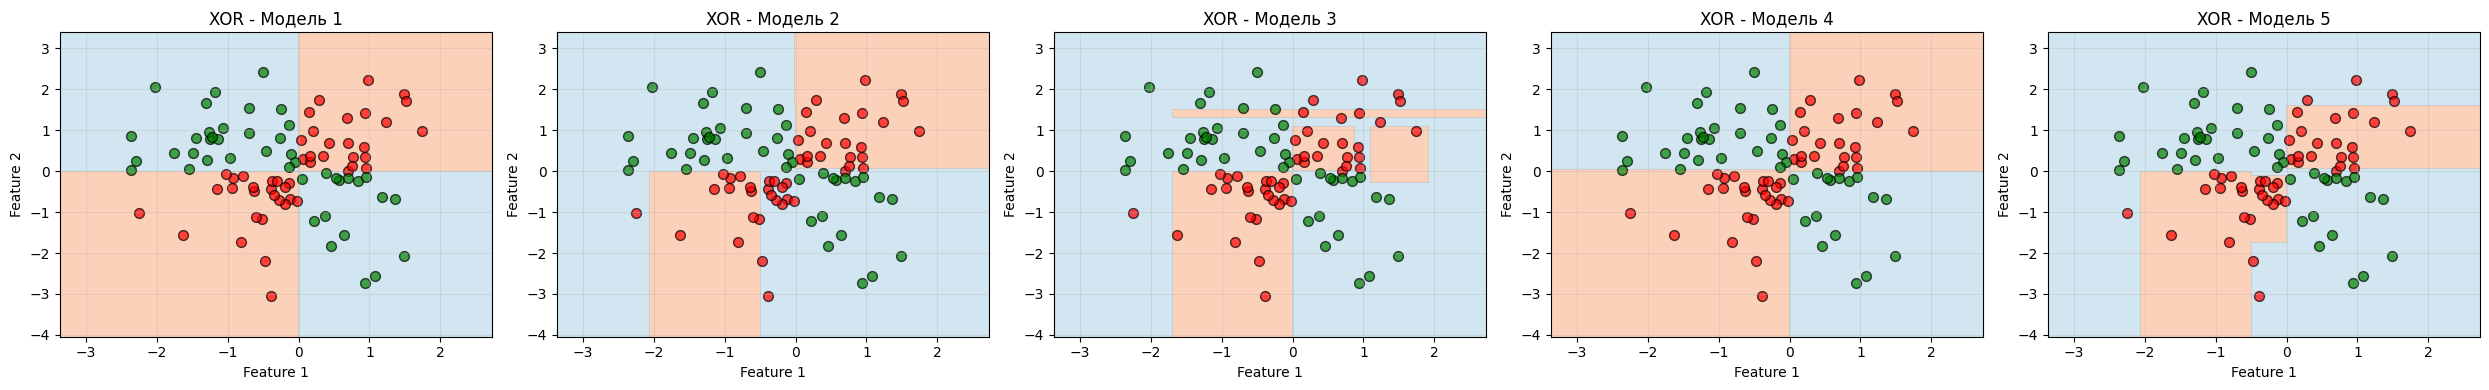


--- ГРАНИЦІ РІШЕНЬ - IRIS DATASET (Sepal) ---


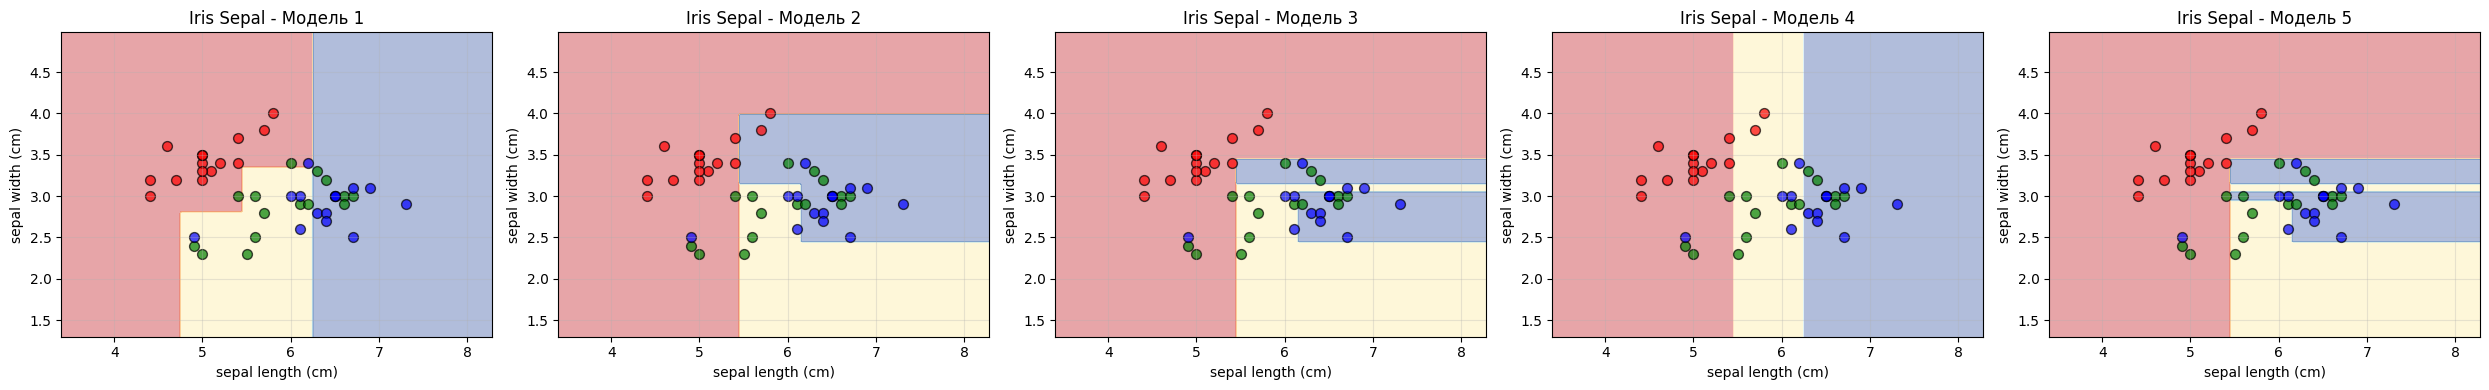


--- ГРАНИЦІ РІШЕНЬ - IRIS DATASET (Petal) ---


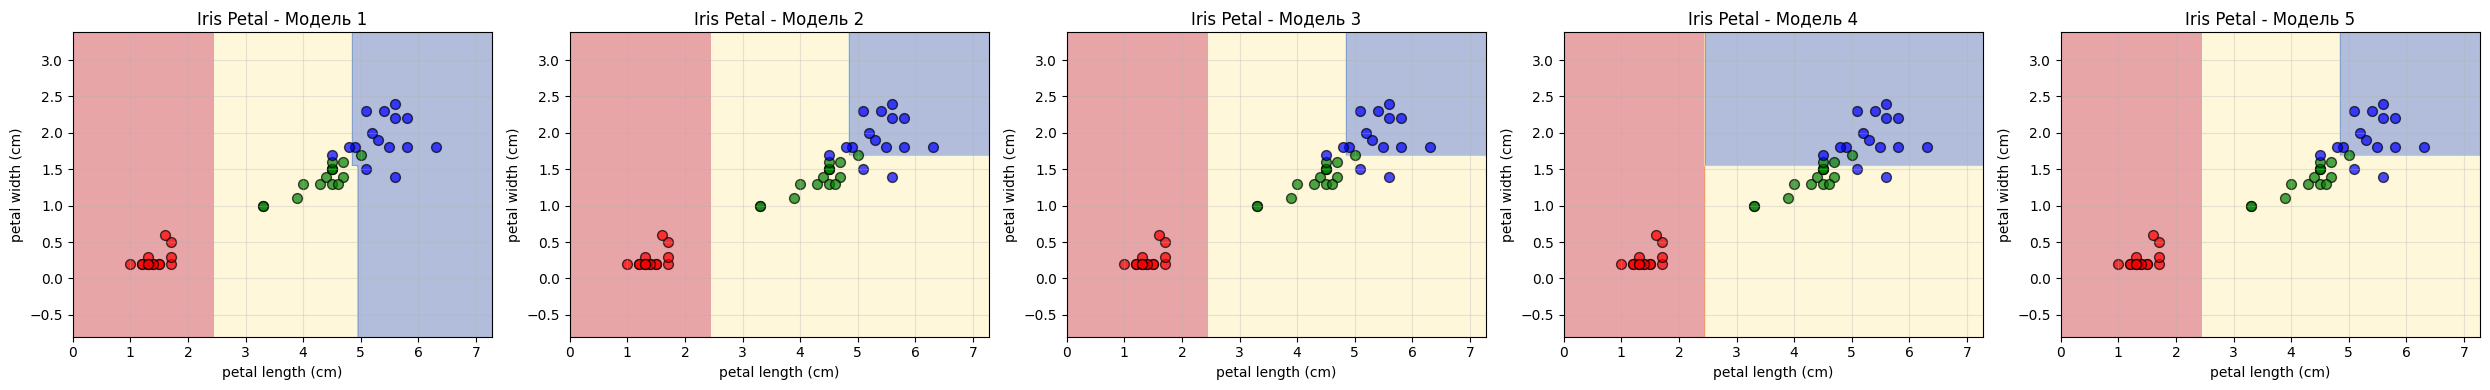

In [8]:
# Візуалізуємо границі рішень для моделей
def plot_decision_boundary_task8(model, X, Y, ax, title, feature_names=None):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    colors = ['red', 'green', 'blue']
    for i in range(len(np.unique(Y))):
        mask = Y == i
        ax.scatter(X[mask, 0], X[mask, 1], c=colors[i],
                  edgecolors='black', alpha=0.7, s=50)

    ax.set_title(title)
    if feature_names:
        ax.set_xlabel(feature_names[0])
        ax.set_ylabel(feature_names[1])
    ax.grid(True, alpha=0.3)

# Границі рішень для XOR Dataset
print("--- ГРАНИЦІ РІШЕНЬ - XOR DATASET ---")
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i in range(5):
    plot_decision_boundary_task8(xor_models[i], X_xor_val, Y_xor_val, axes[i],
                                f'XOR - Модель {i+1}', ['Feature 1', 'Feature 2'])

plt.tight_layout()
plt.show()

# Границі рішень для Iris Dataset - Sepal measurements
print("\n--- ГРАНИЦІ РІШЕНЬ - IRIS DATASET (Sepal) ---")
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i in range(5):
    plot_decision_boundary_task8(iris_sepal_models[i], X_iris_val[:, :2], Y_iris_val, axes[i],
                                f'Iris Sepal - Модель {i+1}',
                                [feature_names[0], feature_names[1]])

plt.tight_layout()
plt.show()

# Границі рішень для Iris Dataset - Petal measurements
print("\n--- ГРАНИЦІ РІШЕНЬ - IRIS DATASET (Petal) ---")
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i in range(5):
    plot_decision_boundary_task8(iris_petal_models[i], X_iris_val[:, 2:], Y_iris_val, axes[i],
                                f'Iris Petal - Модель {i+1}',
                                [feature_names[2], feature_names[3]])

plt.tight_layout()
plt.show()

9. В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:
- матрицю неточностей (confusion matrix),
- точнiсть (precision),
- повноту (recall),
- мiру F1 (F1 score),
- побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.

--- МЕТРИКИ КЛАСИФІКАЦІЇ - XOR DATASET ---

Модель 1:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  Confusion Matrix:
[[47  0]
 [ 0 43]]

Модель 2:
  Precision: 0.8772
  Recall: 0.8511
  F1 Score: 0.8425
  Confusion Matrix:
[[33 14]
 [ 0 43]]

Модель 3:
  Precision: 0.8981
  Recall: 0.8830
  F1 Score: 0.8770
  Confusion Matrix:
[[36 11]
 [ 0 43]]

Модель 4:
  Precision: 0.9896
  Recall: 0.9884
  F1 Score: 0.9889
  Confusion Matrix:
[[47  0]
 [ 1 42]]

Модель 5:
  Precision: 0.9216
  Recall: 0.9149
  F1 Score: 0.9109
  Confusion Matrix:
[[39  8]
 [ 0 43]]

--- МЕТРИКИ КЛАСИФІКАЦІЇ - IRIS DATASET ---

Модель 1:
  Precision: 0.9792
  Recall: 0.9778
  F1 Score: 0.9778
  Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

Модель 2:
  Precision: 0.8519
  Recall: 0.8444
  F1 Score: 0.8429
  Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  5 10]]

Модель 3:
  Precision: 0.8899
  Recall: 0.8889
  F1 Score: 0.8888
  Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]

Модель 4:

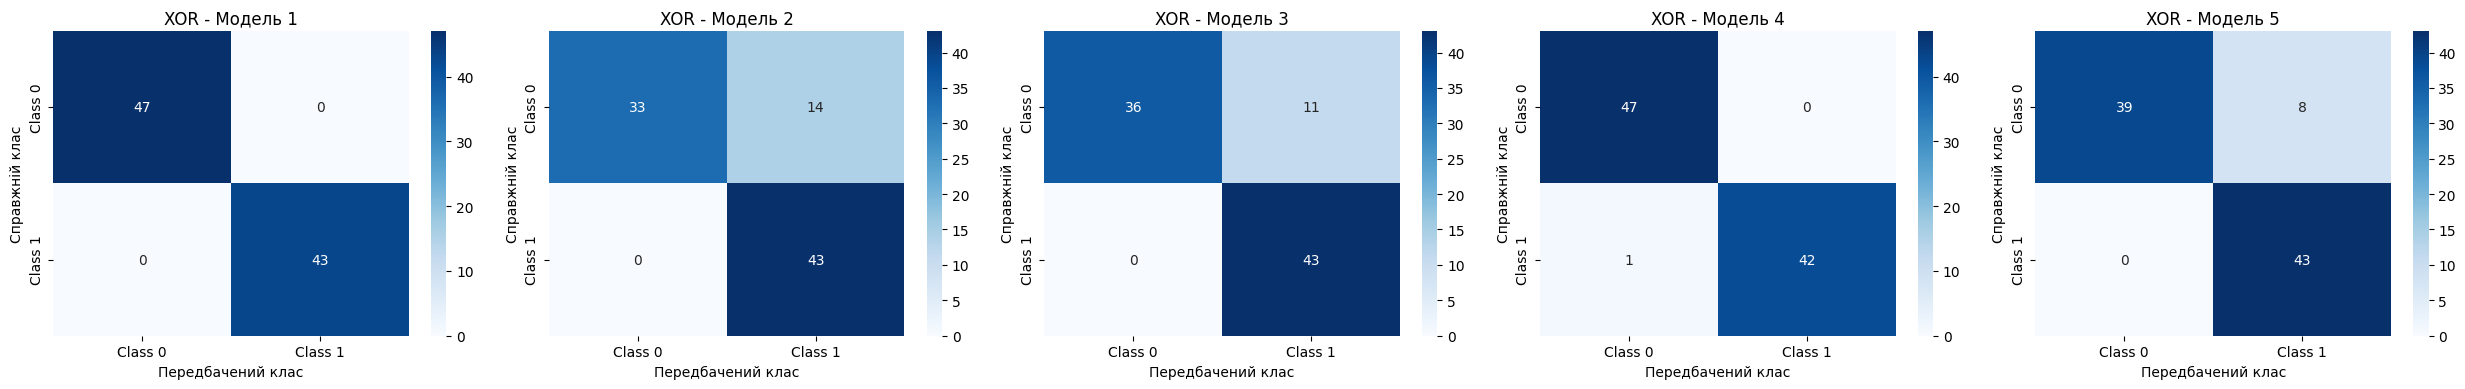


--- ВІЗУАЛІЗАЦІЯ CONFUSION MATRIX - IRIS DATASET ---


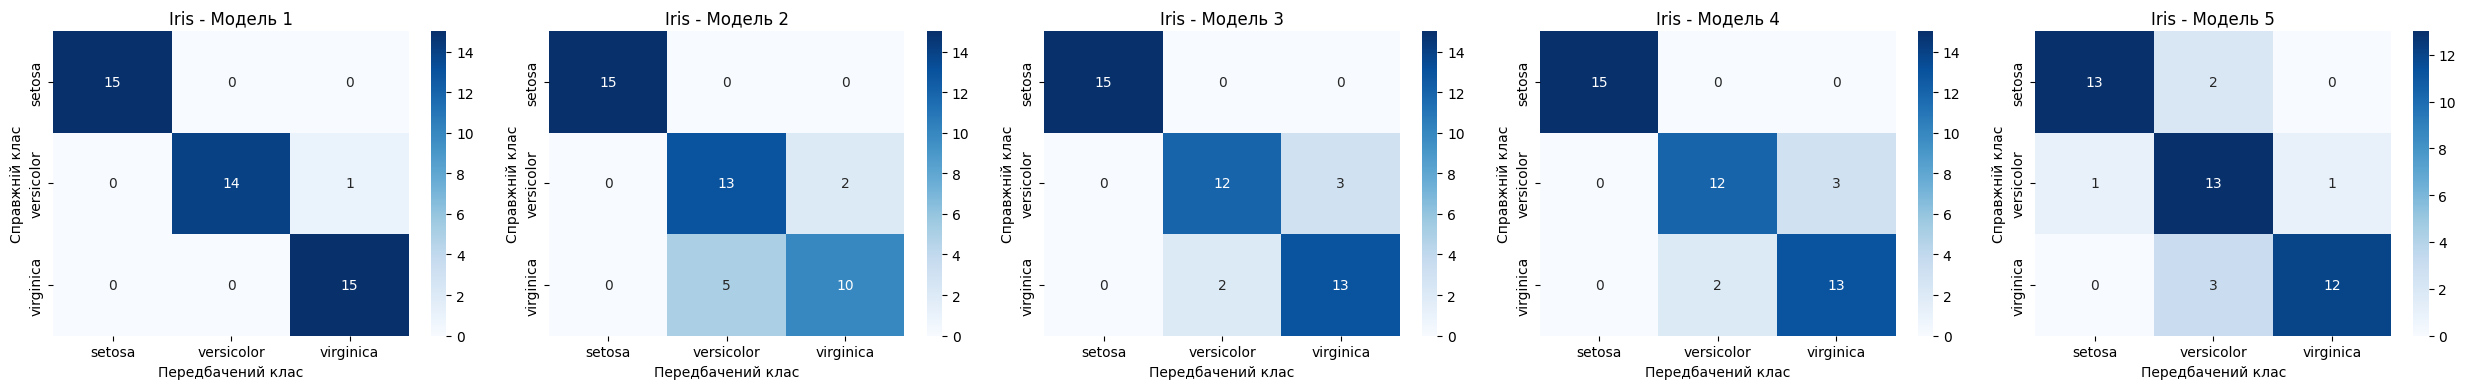


--- ROC CURVE ТА AUC - XOR DATASET ---
Модель 1: AUC = 1.0000
Модель 2: AUC = 0.9184
Модель 3: AUC = 0.9723
Модель 4: AUC = 0.9988
Модель 5: AUC = 0.9555


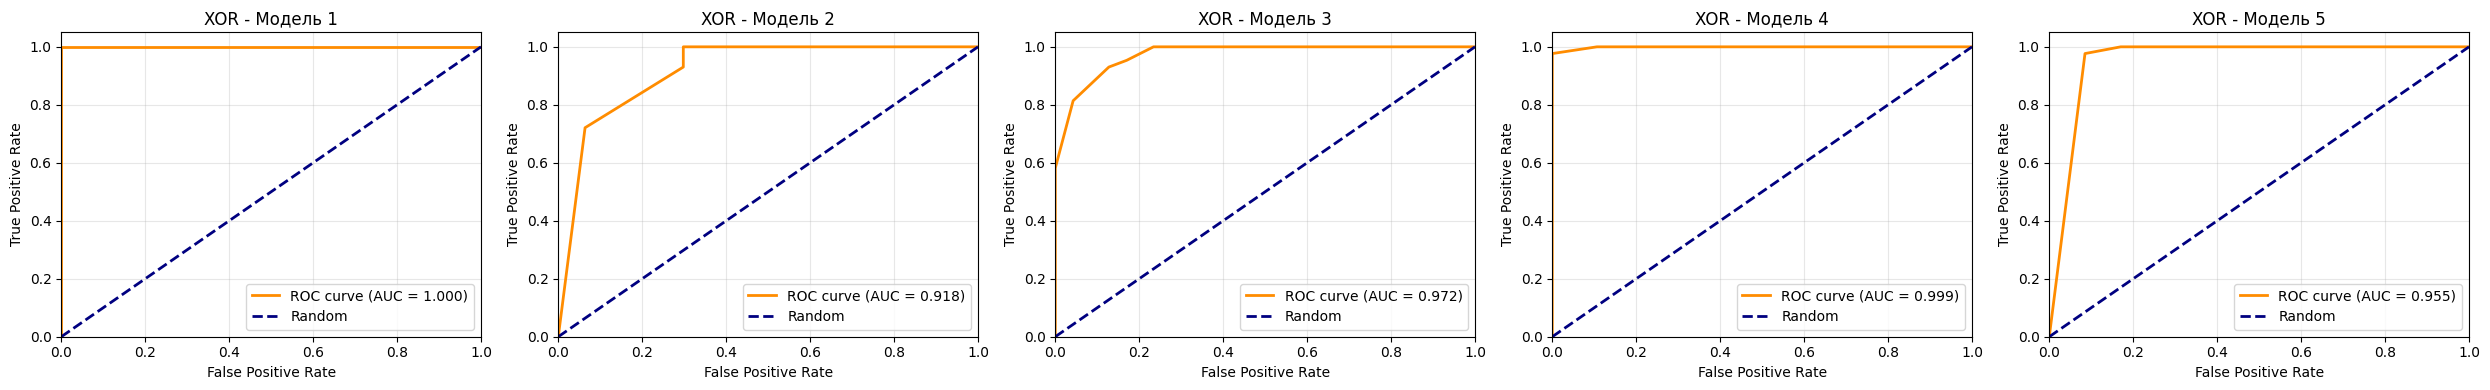


--- PRECISION-RECALL CURVE - XOR DATASET ---


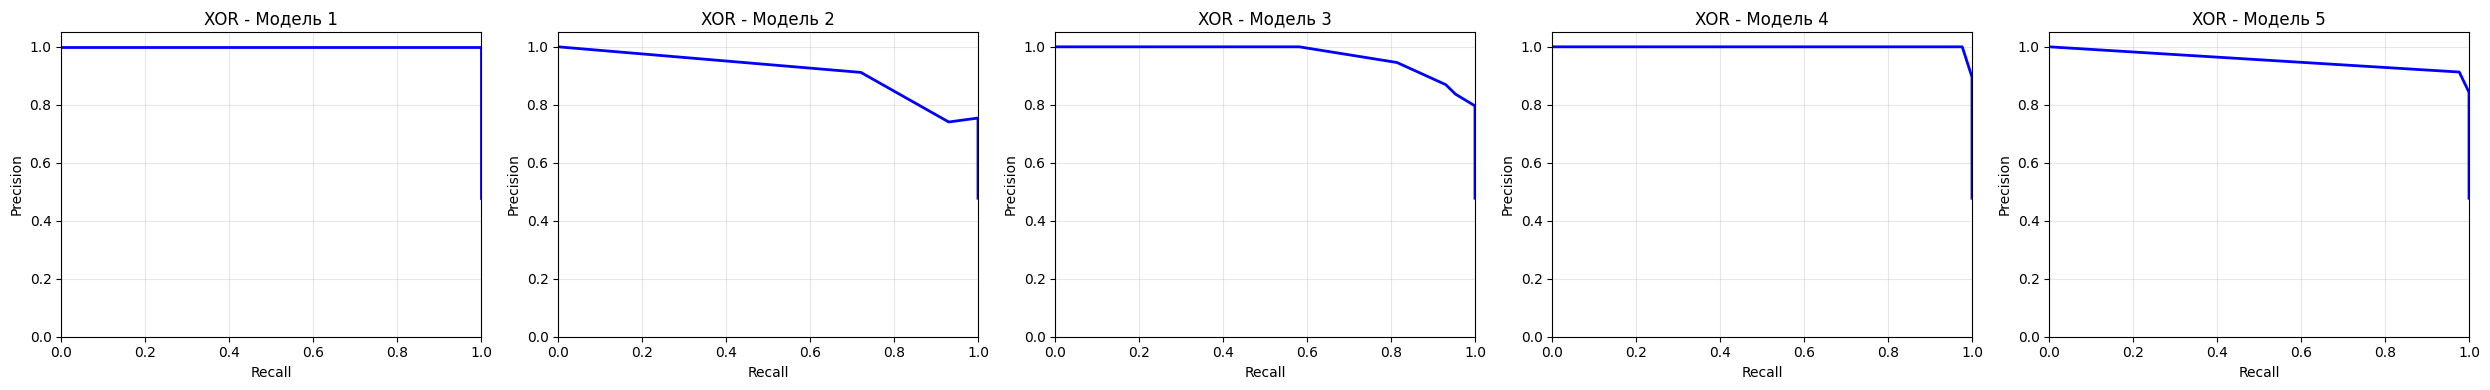


--- ROC CURVE ТА AUC - IRIS DATASET ---
Модель 1:
  setosa: AUC = 1.0000
  versicolor: AUC = 0.9856
  virginica: AUC = 0.9856

Модель 2:
  setosa: AUC = 1.0000
  versicolor: AUC = 0.8878
  virginica: AUC = 0.8878

Модель 3:
  setosa: AUC = 1.0000
  versicolor: AUC = 0.8833
  virginica: AUC = 0.8833

Модель 4:
  setosa: AUC = 1.0000
  versicolor: AUC = 0.9378
  virginica: AUC = 0.9044

Модель 5:
  setosa: AUC = 0.9767
  versicolor: AUC = 0.8711
  virginica: AUC = 0.8822



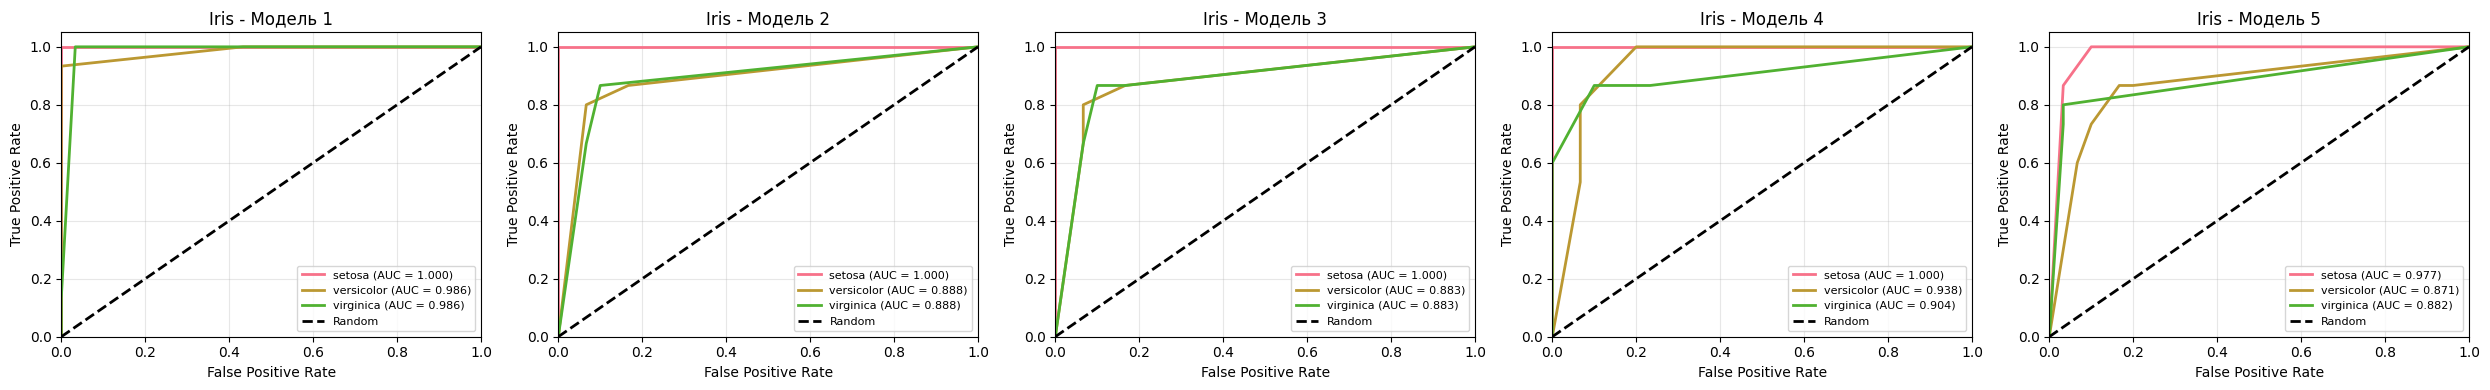


--- PRECISION-RECALL CURVE - IRIS DATASET ---


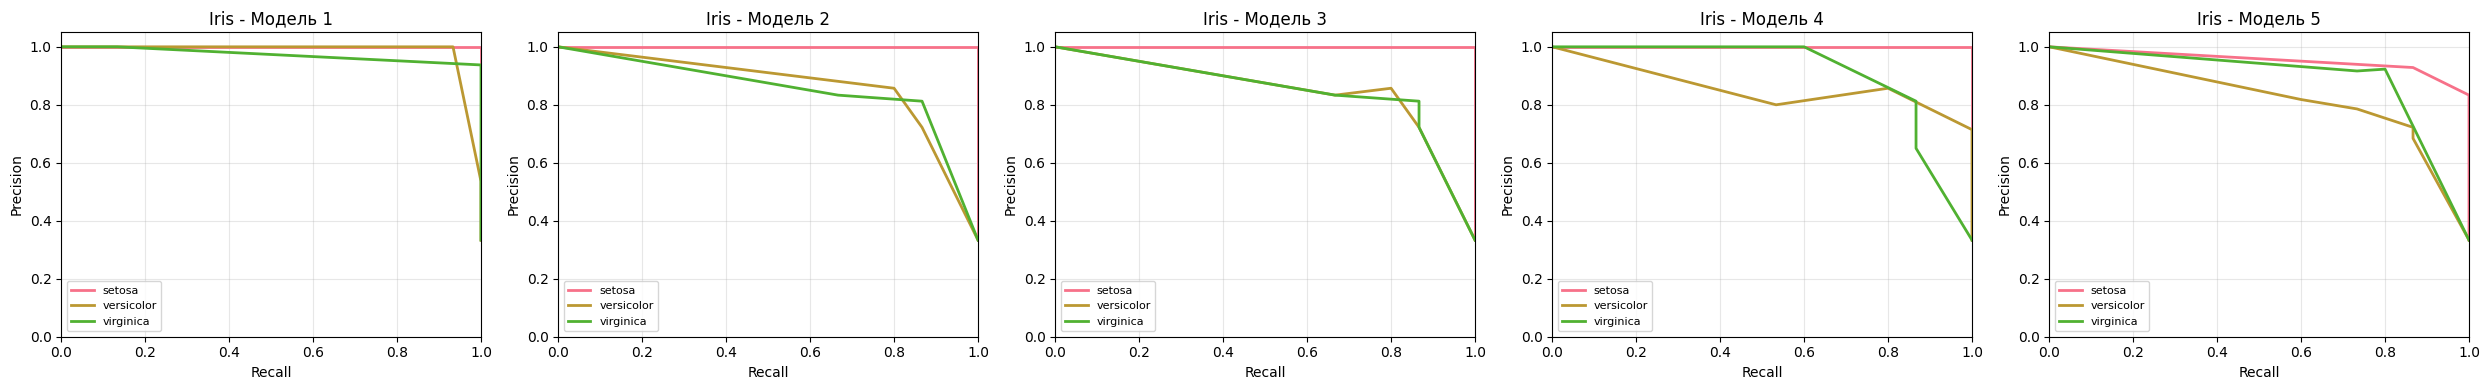

In [9]:
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, roc_auc_score)
from sklearn.preprocessing import label_binarize

def evaluate_classification_metrics(models, X_val, Y_val, dataset_name, class_names):
    print(f"--- МЕТРИКИ КЛАСИФІКАЦІЇ - {dataset_name} ---\n")

    metrics_results = []

    for i, model in enumerate(models, 1):
        predictions = model.predict(X_val)

        # Confusion Matrix
        cm = confusion_matrix(Y_val, predictions)

        # Precision, Recall, F1 (macro averaging для багатокласової класифікації)
        precision = precision_score(Y_val, predictions, average='macro', zero_division=0)
        recall = recall_score(Y_val, predictions, average='macro', zero_division=0)
        f1 = f1_score(Y_val, predictions, average='macro', zero_division=0)

        metrics_results.append({
            'Модель': i,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

        print(f"Модель {i}:")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1 Score: {f1:.4f}")
        print(f"  Confusion Matrix:")
        print(f"{cm}\n")

    return metrics_results

# Розраховуємо метрики для XOR Dataset
xor_metrics = evaluate_classification_metrics(
    xor_models, X_xor_val, Y_xor_val,
    "XOR DATASET", ['Class 0', 'Class 1']
)

# Розраховуємо метрики для Iris Dataset
iris_metrics = evaluate_classification_metrics(
    iris_models, X_iris_val, Y_iris_val,
    "IRIS DATASET", target_names
)

# Візуалізація Confusion Matrix для XOR Dataset
print("\n--- ВІЗУАЛІЗАЦІЯ CONFUSION MATRIX - XOR DATASET ---")
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i in range(5):
    cm = xor_metrics[i]['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    axes[i].set_title(f'XOR - Модель {i+1}')
    axes[i].set_ylabel('Справжній клас')
    axes[i].set_xlabel('Передбачений клас')

plt.tight_layout()
plt.show()

# Візуалізація Confusion Matrix для Iris Dataset
print("\n--- ВІЗУАЛІЗАЦІЯ CONFUSION MATRIX - IRIS DATASET ---")
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i in range(5):
    cm = iris_metrics[i]['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=target_names,
                yticklabels=target_names)
    axes[i].set_title(f'Iris - Модель {i+1}')
    axes[i].set_ylabel('Справжній клас')
    axes[i].set_xlabel('Передбачений клас')

plt.tight_layout()
plt.show()

# Розраховуємо ROC Curve та AUC для XOR Dataset (бінарна класифікація)
print("\n--- ROC CURVE ТА AUC - XOR DATASET ---")
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i, model in enumerate(xor_models):
    # Отримуємо ймовірності для позитивного класу
    y_proba = model.predict_proba(X_xor_val)[:, 1]

    # Обчислюємо ROC curve
    fpr, tpr, _ = roc_curve(Y_xor_val, y_proba)
    roc_auc = auc(fpr, tpr)

    # Малюємо ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.3f})')
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'XOR - Модель {i+1}')
    axes[i].legend(loc="lower right")
    axes[i].grid(True, alpha=0.3)

    print(f"Модель {i+1}: AUC = {roc_auc:.4f}")

plt.tight_layout()
plt.show()

# Розраховуємо Precision-Recall Curve для XOR Dataset
print("\n--- PRECISION-RECALL CURVE - XOR DATASET ---")
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i, model in enumerate(xor_models):
    y_proba = model.predict_proba(X_xor_val)[:, 1]

    # Обчислюємо PR curve
    precision_curve, recall_curve, _ = precision_recall_curve(Y_xor_val, y_proba)

    # Малюємо PR curve
    axes[i].plot(recall_curve, precision_curve, color='blue', lw=2)
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].set_title(f'XOR - Модель {i+1}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Розраховуємо ROC Curve для Iris Dataset (мультикласова - One-vs-Rest)
print("\n--- ROC CURVE ТА AUC - IRIS DATASET ---")
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i, model in enumerate(iris_models):
    # Бінаризуємо класи для One-vs-Rest
    Y_val_bin = label_binarize(Y_iris_val, classes=[0, 1, 2])
    y_proba = model.predict_proba(X_iris_val)

    # Обчислюємо ROC AUC для кожного класу
    print(f"Модель {i+1}:")
    for j in range(3):
        fpr, tpr, _ = roc_curve(Y_val_bin[:, j], y_proba[:, j])
        roc_auc = auc(fpr, tpr)
        axes[i].plot(fpr, tpr, lw=2, label=f'{target_names[j]} (AUC = {roc_auc:.3f})')
        print(f"  {target_names[j]}: AUC = {roc_auc:.4f}")

    axes[i].plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'Iris - Модель {i+1}')
    axes[i].legend(loc="lower right", fontsize=8)
    axes[i].grid(True, alpha=0.3)
    print()

plt.tight_layout()
plt.show()

# Розраховуємо Precision-Recall Curve для Iris Dataset
print("\n--- PRECISION-RECALL CURVE - IRIS DATASET ---")
fig, axes = plt.subplots(1, 5, figsize=(25, 4))

for i, model in enumerate(iris_models):
    Y_val_bin = label_binarize(Y_iris_val, classes=[0, 1, 2])
    y_proba = model.predict_proba(X_iris_val)

    for j in range(3):
        precision_curve, recall_curve, _ = precision_recall_curve(Y_val_bin[:, j], y_proba[:, j])
        axes[i].plot(recall_curve, precision_curve, lw=2, label=f'{target_names[j]}')

    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].set_title(f'Iris - Модель {i+1}')
    axes[i].legend(loc="best", fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

За результатами метрик класифікації найкращою моделлю для обох датасетів є перша модель, що підтверджується максимальним значенням AUC.
Для Iris Dataset перша модель також демонструє найвищі показники precision, recall та F1 score з мінімальною кількістю помилок.
Confusion matrix показує, що основна проблема для Iris Dataset полягає у розрізненні класів versicolor та virginica, які часто плутаються між собою, тоді як клас setosa розпізнається всіма моделями бездоганно.
ROC та PR криві підтверджують високу якість класифікації для простих випадків та труднощі з близькими класами. Друга та третя моделі показують найгірші результати через надмірну складність або недостатню глибину дерева.

10. В задачах регресiї розрахувати для кожної моделi наступнi критерiї якостi, окремо на навчальнiй та валiдацiйнiй множинах:
- коефiцiєнт детермiнацiї R<sup>2</sup>,
- помилки RMSE, MAE та MAPE.

Оскільки за умовою в нас задача класифікації, пропускаємо завдання.

In [10]:
# --- 11. GRID SEARCH ДЛЯ ВИБОРУ НАЙКРАЩИХ ГІПЕРПАРАМЕТРІВ ---

from sklearn.model_selection import GridSearchCV

# Визначаємо сітку параметрів для XOR
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_xor = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_xor.fit(X_xor_train, Y_xor_train)

print("--- РЕЗУЛЬТАТИ GRID SEARCH (XOR) ---")
print(f"Найкращі параметри: {grid_xor.best_params_}")
print(f"Найкраща точність CV: {grid_xor.best_score_:.4f}")

# Для Iris
grid_iris = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_iris.fit(X_iris_train, Y_iris_train)

print("\n--- РЕЗУЛЬТАТИ GRID SEARCH (IRIS) ---")
print(f"Найкращі параметри: {grid_iris.best_params_}")
print(f"Найкраща точність CV: {grid_iris.best_score_:.4f}")


--- РЕЗУЛЬТАТИ GRID SEARCH (XOR) ---
Найкращі параметри: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Найкраща точність CV: 0.9524

--- РЕЗУЛЬТАТИ GRID SEARCH (IRIS) ---
Найкращі параметри: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Найкраща точність CV: 0.9619


In [13]:
# --- 12. АНАЛІЗ ТА ВИБІР НАЙКРАЩОЇ МОДЕЛІ ---

# Створимо таблицю з результатами точності для усіх моделей
xor_summary = xor_overfitting_df[['Модель', 'Train Accuracy', 'Val Accuracy', 'Gap']].copy()
iris_summary = iris_overfitting_df[['Модель', 'Train Accuracy', 'Val Accuracy', 'Gap']].copy()

# Додаємо точність з Grid Search
xor_summary.loc[len(xor_summary)] = ['GridSearch', grid_xor.best_score_, grid_xor.best_estimator_.score(X_xor_val, Y_xor_val),
                                     grid_xor.best_score_ - grid_xor.best_estimator_.score(X_xor_val, Y_xor_val)]
iris_summary.loc[len(iris_summary)] = ['GridSearch', grid_iris.best_score_, grid_iris.best_estimator_.score(X_iris_val, Y_iris_val),
                                       grid_iris.best_score_ - grid_iris.best_estimator_.score(X_iris_val, Y_iris_val)]

print("--- Порівняльна таблиця моделей XOR ---")
print(xor_summary.to_string(index=False))

print("\n--- Порівняльна таблиця моделей IRIS ---")
print(iris_summary.to_string(index=False))

# Вибір найкращої моделі
best_xor_model = grid_xor.best_estimator_
best_iris_model = grid_iris.best_estimator_

print(f"\n✅ Найкраща модель XOR: {best_xor_model}")
print(f"✅ Найкраща модель IRIS: {best_iris_model}")


--- Порівняльна таблиця моделей XOR ---
    Модель  Train Accuracy  Val Accuracy       Gap
         1        1.000000      1.000000  0.000000
         2        0.904762      0.844444  0.060317
         3        0.933333      0.877778  0.055556
         4        0.990476      0.988889  0.001587
         5        0.980952      0.911111  0.069841
GridSearch        0.952381      1.000000 -0.047619

--- Порівняльна таблиця моделей IRIS ---
    Модель  Train Accuracy  Val Accuracy      Gap
         1        0.980952      0.977778 0.003175
         2        0.980952      0.844444 0.136508
         3        0.971429      0.888889 0.082540
         4        0.971429      0.888889 0.082540
         5        0.933333      0.844444 0.088889
GridSearch        0.961905      0.888889 0.073016

✅ Найкраща модель XOR: DecisionTreeClassifier(random_state=42)
✅ Найкраща модель IRIS: DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=42)


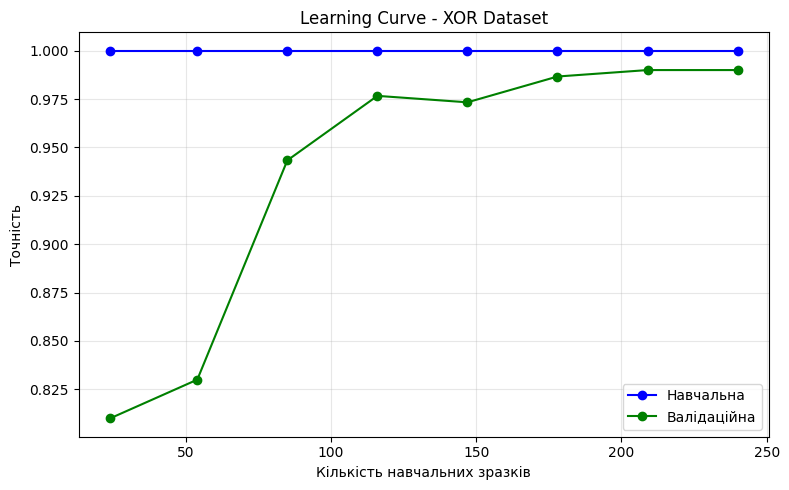

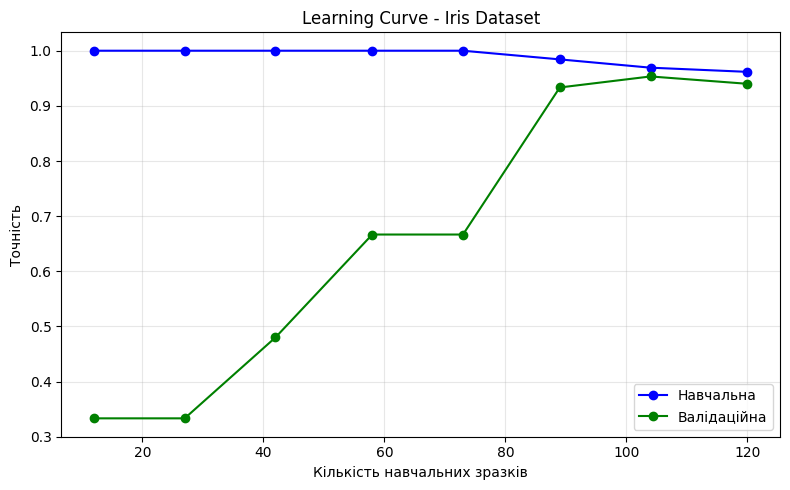

In [12]:
# --- 13. ВПЛИВ РОЗМІРУ НАВЧАЛЬНОЇ ВИБІРКИ ---

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y,
        cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 8),
        n_jobs=-1, random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Навчальна')
    plt.plot(train_sizes, val_mean, 'o-', color='green', label='Валідаційна')
    plt.xlabel('Кількість навчальних зразків')
    plt.ylabel('Точність')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Для XOR
plot_learning_curve(best_xor_model, X_xor, Y_xor, 'Learning Curve - XOR Dataset')

# Для Iris
plot_learning_curve(best_iris_model, X_iris, Y_iris, 'Learning Curve - Iris Dataset')
